In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import json
import os


def plot_3d_parameter_effect(metric_column, metric_view, csv_path, save_name):
    """
    绘制双参数（K：num_of_retrieved_items，M：num_of_retrieved_users）对模型性能指标的3D曲面影响图
    
    参数:
        metric_column:字符串，性能指标在CSV中的列名（如'acc'）
        metric_view :字符串， 性能指标的显示名称（如'ACC'，用于图表标注）
        csv_path :字符串， 包含参数与性能数据的CSV文件路径
        save_name :字符串， 图像保存路径（如'fakeddit_acc.pdf'）

    配色：
    fixed_color = 'RdYlBu_r'
    """
    # 固定全局设置
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 32
    fixed_color = 'RdYlBu_r'  # 固定配色
    fixed_figsize = (10, 8)   # 固定图像尺寸

    # 读取并解析CSV数据
    js = pd.read_csv(csv_path)
    js = js.to_json(orient='records')
    js = json.loads(js)

    # 提取数据：K（x）、M（y）、性能指标（z，转为百分比）
    data = []
    for j in js:
        k = j['num_of_retrieved_items']
        m = j['num_of_retrieved_users']
        metric = j[metric_column] * 100  # 性能值转百分比，便于观察
        data.append([k, m, metric])

    x = np.array([p[0] for p in data])  # 参数K
    y = np.array([p[1] for p in data])  # 参数M
    z = np.array([p[2] for p in data])  # 性能指标

    # 自动找性能最优值（z最大的点）
    max_index = np.argmax(z)
    best_x, best_y, best_z = x[max_index], y[max_index], z[max_index]
    print(f'Best Performance (K, M, {metric_view}): {best_x}, {best_y}, {best_z:.2f}%')

    # 创建3D图形
    fig = plt.figure(figsize=fixed_figsize)
    ax = fig.add_subplot(111, projection='3d')

    # 设置坐标轴范围（自适应数据）
    ax.set_xlim([x.min(), x.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_zlim([z.min(), z.max()])

    # 绘制3D曲面（三角形剖分连接数据点，固定边缘色为黑色）
    ax.plot_trisurf(x, y, z, cmap=fixed_color, edgecolor='k', zorder=1)

    # 坐标轴样式固定设置
    ax.set_xlabel(r'$K$', fontsize=28, labelpad=30)
    ax.set_ylabel(r'$M$', fontsize=28, labelpad=30)
    ax.set_zlabel('', fontsize=28, labelpad=20)  # 隐藏Z轴标签，用text2D替代
    ax.tick_params(axis='both', which='major', labelsize=26)
    ax.invert_xaxis()  # X轴固定反向（从大到小）
    # 固定刻度标签间距
    ax.zaxis.set_tick_params(pad=25)
    ax.yaxis.set_tick_params(pad=10)
    ax.xaxis.set_tick_params(pad=8)

    # 固定添加指标标签与最优值标记
    ax.text2D(1.06, 0.85, metric_view, fontsize=28, transform=ax.transAxes,
              ha='center', va='center')  # 右侧显示指标名称
    ax.plot([best_x], [best_y], [best_z + 0.005], color='black', marker='*',
            markersize=32, linestyle='None', label='Best Performance',
            zorder=10, markeredgecolor='k', markeredgewidth=1)  # 最优值黑色星标
    ax.legend(loc='upper right', bbox_to_anchor=(1.22, 1), fontsize=20, handletextpad=0.01)

    # 保存图像（自动创建不存在的目录）
    os.makedirs(os.path.dirname(save_name), exist_ok=True)
    plt.savefig(save_name, format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
plot_3d_parameter_effect(
        metric_column='acc',          # CSV中性能指标列名
        metric_view='ACC',            # 图表上显示的指标名
        csv_path='fakeddit200.csv',   # 数据文件路径
        save_name='fakeddit_acc_E_U_v2.pdf'  # 图像保存路径
)

Best Performance: K=100, M=55, ACC=89.92%


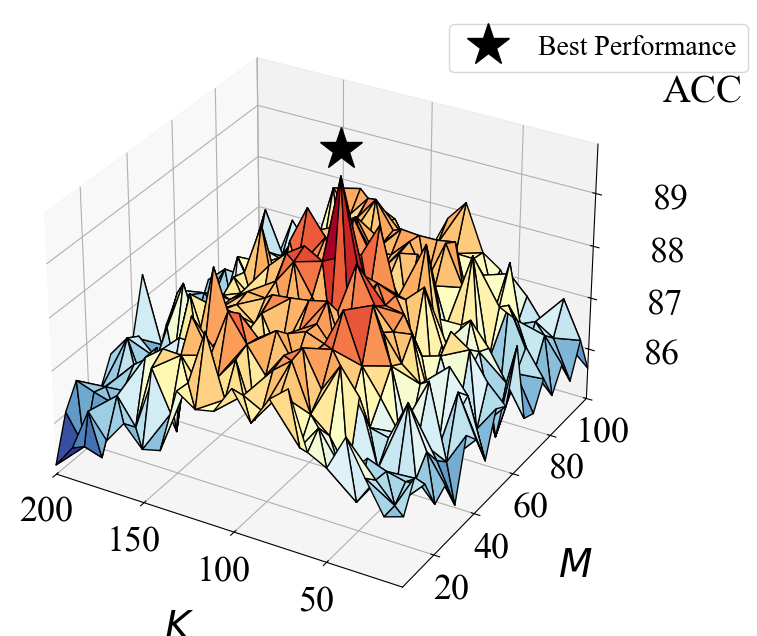

In [1]:
#以下是为了呈现画图效果和适应编造数据的改版
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# 生成K和M的取值范围（K: 10~200，M: 5~100，步长分别为10和5）
K = np.arange(10, 210, 10)  # [10,20,...,200]
M = np.arange(5, 105, 5)    # [5,10,...,100]
K, M = np.meshgrid(K, M)    # 生成网格点

# 模拟准确率数据（ACC）：围绕最优值形成曲面，加入随机波动
# 假设最优参数为K=100，M=50，此时ACC最高（约92%）
np.random.seed(42)
base_acc = 85 + 3 * np.exp(-0.0001 * ((K - 100)**2 + (M - 50)** 2))  # 基础曲面
noise = np.random.normal(0, 0.5, size=base_acc.shape)  # 随机噪声
acc = base_acc + noise
acc = np.clip(acc, 84, 92)  # 限制在合理范围

# 转换为代码所需的列表格式：[{K, M, acc}, ...]
data_list = []
for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        data_list.append({
            'num_of_retrieved_items': int(K[i, j]),
            'num_of_retrieved_users': int(M[i, j]),
            'acc': acc[i, j] / 100  # 还原为0~1范围（代码中会×100）
        })
# 设置参数（保持不变）
metric_column = 'acc'
metric_view = 'ACC'
dataset = 'fakeddit'
save_name = f'{dataset}_{metric_column}_E_U_v2.pdf'
color = 'RdYlBu_r'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 32

# 使用编造的数据（替代CSV读取）
js = data_list  # data_list为上文编造的数据

# 提取x(K)、y(M)、z(ACC)
x = np.array([j['num_of_retrieved_items'] for j in js])
y = np.array([j['num_of_retrieved_users'] for j in js])
z = np.array([j[metric_column] * 100 for j in js])  # 转为百分比

# 绘制3D曲面图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 找到性能最优的点（z最大）
max_index = np.argmax(z)
best_x = x[max_index]
best_y = y[max_index]
best_z = z[max_index]
print(f'Best Performance: K={best_x}, M={best_y}, ACC={best_z:.2f}%')

# 设置坐标轴范围
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ax.set_zlim([min(z), max(z)])

# 绘制曲面（用三角形剖分连接散点形成曲面）
ax.plot_trisurf(x, y, z, cmap=color, edgecolor='k', zorder=1)

# 设置坐标轴标签和样式
ax.set_xlabel(r'$K$', fontsize=28, labelpad=30)
ax.set_ylabel(r'$M$', fontsize=28, labelpad=30)
ax.set_zlabel('', fontsize=28, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=26)
ax.invert_xaxis()  # X轴反向（从大到小）
ax.zaxis.set_tick_params(pad=25)

# 添加性能指标标签和最优值标记
ax.text2D(1.06, 0.85, metric_view, fontsize=28, transform=ax.transAxes)
ax.plot([best_x], [best_y], [best_z + 0.5], color='black', marker='*',
        markersize=32, linestyle='None', label='Best Performance', zorder=10)
ax.legend(loc='upper right', bbox_to_anchor=(1.22, 1), fontsize=20)

# 保存并显示
plt.savefig(save_name, format='pdf')
plt.show()